# Programming Assignment 1: Point Inside Shape
## Members: Andy Dao, Mikhail Filippov, Patrick Saxton

In this assignment, we are to solve a computation problem of detecting if a given point is inside a shape, and write the algorithm associated with that solution. We are then to analyze the algorithm through a series of techniques learned in class, include testing, proving correctness, and solving for running time.

In [2]:
#imports
import dill

In [4]:
# load session
# run if loading saved session
dill.load_session('notebook.db')

ModuleNotFoundError: No module named 'sklearn'

### Pseudocode
```plaintext
FUNCTION SegmentCheck(p1, p2, p):
    IF (p.x < MIN(p1.x, p2.x) OR p.x > MAX(p1.x, p2.x) OR
        p.y < MIN(p1.y, p2.y) OR p.y > MAX(p1.y, p2.y)) THEN
        RETURN False
    END IF

    IF p1.x == p2.x THEN
        RETURN (p.x == p1.x)
    END IF

    IF p1.y == p2.y THEN
        RETURN (p.y == p1.y)
    END IF

    IF (p.x - p1.x) * (p2.y - p1.y) == (p.y - p1.y) * (p2.x - p1.x) THEN
        RETURN True
    ELSE
        RETURN False
    END IF
END FUNCTION


FUNCTION CheckIntersection(p1, p2, x, y):
    IF ( (p1.y > y AND p2.y > y) OR (p1.y <= y AND p2.y <= y) ) THEN
        RETURN False
    END IF

    x_intersection = p1.x + (y - p1.y) * (p2.x - p1.x) / (p2.y - p1.y)

    RETURN (x <= x_intersection)
END FUNCTION


FUNCTION PointInPolygon(point, polygon):
    IF (LENGTH(polygon) < 3) THEN
        RAISE ERROR "The list of polygon points must have at least 3 points"
    END IF

    inside = False
    num_vertices = LENGTH(polygon)
    (x, y) = (point.x, point.y)
    p1 = polygon[0]

    FOR i FROM 1 TO num_vertices:
        p2 = polygon[i MOD num_vertices]

        IF PointOnSegment(p1, p2, point) THEN
            RETURN True
        END IF

        IF CheckIntersection(p1, p2, x, y) THEN
            inside = NOT inside
        END IF

        p1 = p2
    END FOR

    RETURN inside
END FUNCTION
```

### Algorithm Implemented:

In [5]:
from typing import List, Tuple

class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y

def point_on_segment(p1: Point, p2: Point, p: Point) -> bool:
    if not (min(p1.x, p2.x) <= p.x <= max(p1.x, p2.x) and min(p1.y, p2.y) <= p.y <= max(p1.y, p2.y)):
        return False

    if p1.x == p2.x:
        return p.x == p1.x
    if p1.y == p2.y:
        return p.y == p1.y

    return (p.x - p1.x) * (p2.y - p1.y) == (p.y - p1.y) * (p2.x - p1.x)

def check_intersection(p1: Point, p2: Point, x: float, y: float) -> bool:
    if (p1.y > y) == (p2.y > y):
        return False

    x_intersection = p1.x + (y - p1.y) * (p2.x - p1.x) / (p2.y - p1.y)

    return x <= x_intersection

def point_in_polygon(point: Point, polygon: List[Point]) -> bool:
    if len(polygon) < 3:
        raise ValueError("The list of polygon points must have at least 3 points")

    num_of_vertices = len(polygon)
    x, y = point.x, point.y
    inside = False

    p1 = polygon[0]

    for i in range(1, num_of_vertices + 1):
        p2 = polygon[i % num_of_vertices]

        if point_on_segment(p1, p2, point):
            return True

        if check_intersection(p1, p2, x, y):
            inside = not inside

        p1 = p2

    return inside

### Testing Suite:

In [6]:
import unittest

class TestGeometry(unittest.TestCase):

    def test_point_inside_polygon(self):
        polygon = [Point(0, 0), Point(4, 0), Point(4, 4), Point(0, 4)]
        point = Point(2, 2)
        self.assertTrue(point_in_polygon(point, polygon))

    def test_point_outside_polygon(self):
        polygon = [Point(0, 0), Point(4, 0), Point(4, 4), Point(0, 4)]
        point = Point(5, 5)
        self.assertFalse(point_in_polygon(point, polygon))

    def test_point_on_edge_of_polygon(self):
        polygon = [Point(0, 0), Point(4, 0), Point(4, 4), Point(0, 4)]
        point = Point(4, 2)
        self.assertTrue(point_in_polygon(point, polygon))

    def test_polygon_with_less_than_three_points(self):
        polygon = [Point(0, 0), Point(4, 0)]
        point = Point(2, 2)
        with self.assertRaises(ValueError):
            point_in_polygon(point, polygon)

    def test_point_on_horizontal_segment(self):
        p1 = Point(0, 0)
        p2 = Point(4, 0)
        p = Point(2, 0)
        self.assertTrue(point_on_segment(p1, p2, p))

    def test_point_on_vertical_segment(self):
        p1 = Point(0, 0)
        p2 = Point(0, 4)
        p = Point(0, 2)
        self.assertTrue(point_on_segment(p1, p2, p))

    def test_point_on_diagonal_segment(self):
        p1 = Point(0, 0)
        p2 = Point(4, 4)
        p = Point(2, 2)
        self.assertTrue(point_on_segment(p1, p2, p))

    def test_point_not_on_segment(self):
        p1 = Point(0, 0)
        p2 = Point(4, 4)
        p = Point(3, 2)
        self.assertFalse(point_on_segment(p1, p2, p))

    def test_point_outside_segment_bounds(self):
        p1 = Point(0, 0)
        p2 = Point(4, 4)
        p = Point(5, 5)
        self.assertFalse(point_on_segment(p1, p2, p))

    def test_intersection_within_bounds(self):
        p1 = Point(0, 0)
        p2 = Point(4, 4)
        self.assertTrue(check_intersection(p1, p2, 2, 2))

    def test_intersection_outside_bounds(self):
        p1 = Point(0, 0)
        p2 = Point(4, 4)
        self.assertFalse(check_intersection(p1, p2, 5, 5))

    def test_intersection_on_horizontal_edge(self):
        p1 = Point(0, 0)
        p2 = Point(4, 0)
        self.assertFalse(check_intersection(p1, p2, 2, 0))

    def test_point_inside_concave_polygon(self):
        polygon = [Point(0, 0), Point(4, 0), Point(4, 4), Point(2, 2), Point(0, 4)]
        point = Point(1, 1)
        self.assertTrue(point_in_polygon(point, polygon))

    def test_point_outside_concave_polygon(self):
        polygon = [Point(0, 0), Point(4, 0), Point(4, 4), Point(2, 2), Point(0, 4)]
        point = Point(3, 3)
        self.assertTrue(point_in_polygon(point, polygon))

    def test_point_inside_complex_polygon(self):
        polygon = [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)]
        point = Point(2, 2)
        self.assertTrue(point_in_polygon(point, polygon))

    def test_point_outside_complex_polygon(self):
        polygon = [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)]
        point = Point(5, 5)
        self.assertFalse(point_in_polygon(point, polygon))

    def test_point_on_edge_complex_polygon(self):
        polygon = [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)]
        point = Point(2, 4)
        self.assertTrue(point_in_polygon(point, polygon))

    def test_point_on_vertex_complex_polygon(self):
        polygon = [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)]
        point = Point(2, 6)
        self.assertTrue(point_in_polygon(point, polygon))

    def test_point_near_edge_but_outside(self):
        polygon = [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)]
        point = Point(2, 6.1)
        self.assertFalse(point_in_polygon(point, polygon))

if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)

...................
----------------------------------------------------------------------
Ran 19 tests in 0.027s

OK


# Table of test cases
| Polygon                                                                                     | Point        | Description                                            | Expected Result | Actual Result |
|---------------------------------------------------------------------------------------------|--------------|--------------------------------------------------------|-----------------|---------------|
| [Point(0, 0), Point(4, 0), Point(4, 4), Point(2, 2), Point(0, 4)]                           | Point(1,1)   | Point is inside the concave polygon                    | True            | true          |
| [Point(0, 0), Point(4, 0), Point(4, 4), Point(2, 2), Point(0, 4)]                           | Point(3,3)   | Point is outside the concave polygon                   | False           | false         |
| [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)] | Point(2,2)   | Point is inside the complex polygon                    | True            | true          |
| [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)] | Point(5,5)   | Point is outside the complex polygon                   | False           | false         |
| [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)] | Point(2,4)   | Point is on the edge of the complex polygon            | True            | true          |
| [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)] | Point(2,6)   | Point is on the vertex of the complex polygon          | True            | true          |
| [Point(2, 6), Point(0, 4), Point(1, 1), Point(3, 0), Point(5, 2), Point(4, 4), Point(2, 3)] | Point(2,6.1) | Point is near the edge but outside the complex polygon | False           | false         |

### General Form of Usage:

In [7]:
if __name__ == "__main__":
    test_point = Point(176, 100)

    polygon_points = [
        Point(186, 14),
        Point(186, 44),
        Point(175, 115),
        Point(175, 85)
    ]

    print("Point is inside the polygon" if point_in_polygon(test_point, polygon_points) else "Point is outside the polygon")

Point is inside the polygon


### Asymptotic Worst-Case Analysis
-------------------
Given the main function of the algorithm, `point_in_polygon()`, relies on helper functions, we must first analyze those:
- `point_on_segment()`: This function does not do anything demanding and runs in constant time, given that it is a series of `if` statements with calls to `min()` and `max()`, which also compare two objects in constant time. This gives this helper an O(1).
- `check_intersection()`: As with the above function, this function has even less instructions; it includes simple `if` logic and addition and subtraction statements. This gives this helper an O(1).

With these in mind, we can now move on to `point_in_polygon()`. The function is as follows:

-------------------
```py
def point_in_polygon(point: Point, polygon: List[Point]) -> bool:
    if len(polygon) < 3:
        raise ValueError("The list of polygon points must have at least 3 points")

    num_of_vertices = len(polygon)
    x, y = point.x, point.y
    inside = False

    p1 = polygon[0]

```
-------------------
Up to this point, all operations above this statement have been constant time, so we can reduce them to O(1).

-------------------

```py
    for i in range(1, num_of_vertices + 1):
        p2 = polygon[i % num_of_vertices]

        if point_on_segment(p1, p2, point):
            return True

        if check_intersection(p1, p2, x, y):
            inside = not inside

        p1 = p2

    return inside
```
-------------------
We can see the above `for` loop runs for *n* number of times, where *n* represents the number of vertices on the bounding shape. Because we have stated that both `point_on_segment()` and `check_intersection()` are O(1), we know that there are no more statements within this `for` loop that will raise the time any more.

#### **Therefore, the worst-case of our function is O(n).**

-------------------

### Benchmarking:

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import random
from scipy.stats import linregress

In [9]:
def benchmark(point: Point, points: List[Point]):
    start = time.perf_counter()
    point_in_polygon(point, points)
    end = time.perf_counter()
    return (end - start)

In [10]:
test_point = Point(100, 100)
n = [5+1000*x for x in range(101)]
times = []
for i in tqdm(n):
    random_x = random.randint(0, 200)
    random_y = random.randint(0, 200)
    points = [Point(random_x, random_y) for x in range(i)]
    times.append(benchmark(test_point, points))

100%|██████████| 101/101 [00:04<00:00, 22.31it/s]


Text(0.5, 1.0, 'Performance of the point_in_polygon function')

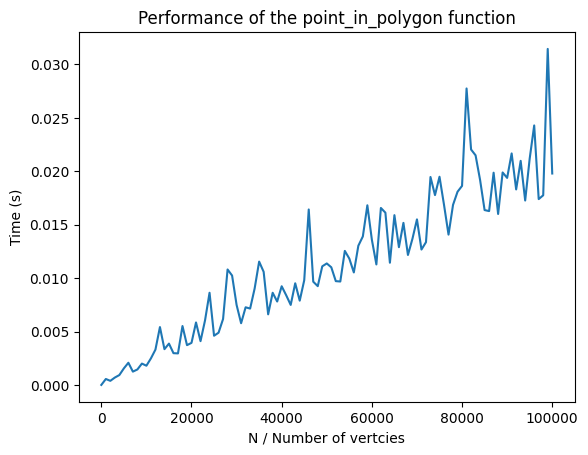

In [11]:
plt.plot(n, times)
plt.xlabel("N / Number of vertcies")
plt.ylabel("Time (s)")
plt.title("Performance of the point_in_polygon function")

In [12]:
data = pd.DataFrame({"n": n, "time": times})
print("Data Table for N vs Time")
data

Data Table for N vs Time


,n,time
0,5,0.000009
1,1005,0.000563
2,2005,0.000392
3,3005,0.000700
4,4005,0.000934
...,...,...
96,96005,0.024286
97,97005,0.017394
98,98005,0.017751
99,99005,0.031444


In [15]:
# Estimate the slope of a linear regression on our benchmarking
slope, intercept, r_value, p_value, std_err = linregress(np.log(n), np.log(times))
print(f"Estimated slope: {slope}")

Estimated slope: 0.8516914996241363


### Benchmarking Comparison
With our theoretical run-time of **O(n)**, we can compare that to what our benchmark results produced. We can see that the **slope** calculated from the fitted linear regression is < 1. As such, we know that the benchmark ran **sub-linearly**, yet close to linear.

This can hold up with our theoretical **O(n)**, as O notation is an *upper* bound on time complexity. As such, it makes sense for an actual benchmark to show something slightly below that, validating our theoretical **O(n)**.

Furthermore on a side note, we can see that purely by visuals on the graph, there is a positive *linear* trend for the data points; as n increases, so does the time in a linear fashion.

In [123]:
# save session variables
dill.dump_session('notebook.db')